# Problem Statement
Imagine you've been hired as a senior data scientist by the City of Milwaukee. Your task is to analyze data from their call center operations. The city has carefully collected this data — now it's your mission to explore it, uncover insights, and provide recommendations. We're most interested in how you think, so be sure to walk us through your reasoning and the approaches you choose. Use your analytical skills and creativity to tell a compelling story, and support your insights with clear, effective visualizations.

# Load & Understand Data

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
!pip install pandas_profiling
!pip install ydata_profiling

In [53]:
df_hist = pd.read_csv("/content/callcenterdatacurrent.csv")
df_curr = pd.read_csv("/content/callcenterdatahistorical.csv")

In [54]:
df_hist.head()

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
0,2025-06-15 00:00:00,2634 N 59TH ST,Illegal Auto Repair on Private Property,2025-06-16 00:00:00,Please keep my information confidential. Neigh...
1,2025-06-15 00:00:00,"3720 W FAIRMOUNT AV, MILWAUKEE, WI, 53209-5348",Scattered Litter and Debris on Private Property,NaN,"According to the constituent, trash has been l..."
2,2025-06-15 00:00:00,"9719 W TOWER AV, MILWAUKEE, WI, 53224-2998","Brush Pickup Request, Less than 2 Cubic Yards,...",NaN,Please pick up brush next to and west of the d...
3,2025-06-15 00:00:00,"1984 W CONGRESS ST, MILWAUKEE, WI, 53209-0000",Windows Broken or Missing,NaN,Windows are busted out because they are contin...
4,2025-06-15 00:00:00,"300 S BARCLAY ST, MILWAUKEE, WI, 53204-1623",Bulky Pickup & San Inspector Notification,NaN,POLICECALL P2506141211 // SOUTH OF LOCATION ON...


In [55]:
df_curr.head()

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
0,2024-12-31 00:00:00,"6000 W KINNICKINNIC RIVER PK, MILWAUKEE, WI, 5...",Area Dark,2025-01-01 00:00:00,Lights along kk parkway between 60th and Cleve...
1,2024-12-31 00:00:00,"4701 W WASHINGTON BL, 1",Potholes,NaN,Potholes are bad to the east of N 47th St on W...
2,2024-12-31 00:00:00,"4719 W NASH ST, MILWAUKEE, WI, 53216-2918",Missed Collection: Garbage,2024-12-31 00:00:00,Checked online and checked printed schedule g...
3,2024-12-31 00:00:00,"3141 S QUINCY AV, MILWAUKEE, WI, 53207-2717",Missed Collection: Garbage,NaN,Our garbage and recycling bins haven’t been se...
4,2024-12-31 00:00:00,"2800 N 72ND ST, MILWAUKEE, WI, 53210-1105",Area Dark,2025-01-01 00:00:00,Lights have been out since Christmas


In [56]:
df_curr.tail()

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
165251,2020-04-27 00:00:00,"3925 W FOREST HOME AV, MILWAUKEE, WI, 532153536",Drainage or Standing Water Not Related to a Cl...,NaN,Alley has sunken allowing it to collect and ho...
165252,2020-04-27 00:00:00,"1628 N 36TH ST, MILWAUKEE, WI, 532082346",Garbage Cart: No Cart,NaN,Address has no garbage or recycling carts. We...
165253,2020-04-26 00:00:00,"915 R E WISCONSIN AV, MILWAUKEE, WI, 532020000",Other Miscellaneous Electrical Services Request,2020-04-27 00:00:00,The big clock on the Miller Brewing Pavilion h...
165254,2020-04-25 00:00:00,"3060 N GORDON CR, MILWAUKEE, WI, 532122224",Recycling Supervisor Notification,NaN,Missed collections
165255,2020-03-21 00:00:00,"Santa Clara, CA, USA",Ask the City of Santa Clara a question,2020-03-22 00:00:00,Is Santa Clara going to issue a moratorium on ...


In [57]:
df_hist.shape, df_curr.shape

((4174, 5), (165256, 5))

**Insight:**.
- Historical dataset has 4174 records while current dataset has 165256 records

In [58]:
# Check if historical datset is a part of current dataset

df_hist_sorted = df_hist[sorted(df_hist.columns)]
df_curr_sorted = df_curr[sorted(df_curr.columns)]


records_df_hist = set(map(tuple, df_hist_sorted.to_numpy()))
records_df_curr = set(map(tuple, df_curr_sorted.to_numpy()))


all_included = records_df_hist.issubset(records_df_curr)
print("All records of df_hist are in df_curr:", all_included)

All records of df_hist are in df_curr: False


In [71]:
df_curr.duplicated().sum()

np.int64(36981)

**Insight:**.
They are two different datasets

In [66]:
# prompt: convert CREATIONDATE and CLOSEDDATETIME columns to datetime format

df_hist['CREATIONDATE'] = pd.to_datetime(df_hist['CREATIONDATE'])
df_hist['CLOSEDDATETIME'] = pd.to_datetime(df_hist['CLOSEDDATETIME'])
df_curr['CREATIONDATE'] = pd.to_datetime(df_curr['CREATIONDATE'])
df_curr['CLOSEDDATETIME'] = pd.to_datetime(df_curr['CLOSEDDATETIME'])

In [67]:
# check earliest date for each datset

print("Earliest date in df_hist:", df_hist['CREATIONDATE'].min())
print("Earliest date in df_curr:", df_curr['CREATIONDATE'].min())

Earliest date in df_hist: 2025-01-01 00:00:00
Earliest date in df_curr: 2020-03-21 00:00:00


**Insight:**
Historical data has newer records than current dataset

In [59]:
# Join the two datasets
df = pd.concat([df_hist, df_curr], ignore_index=True)
df.head()

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
0,2025-06-15 00:00:00,2634 N 59TH ST,Illegal Auto Repair on Private Property,2025-06-16 00:00:00,Please keep my information confidential. Neigh...
1,2025-06-15 00:00:00,"3720 W FAIRMOUNT AV, MILWAUKEE, WI, 53209-5348",Scattered Litter and Debris on Private Property,NaN,"According to the constituent, trash has been l..."
2,2025-06-15 00:00:00,"9719 W TOWER AV, MILWAUKEE, WI, 53224-2998","Brush Pickup Request, Less than 2 Cubic Yards,...",NaN,Please pick up brush next to and west of the d...
3,2025-06-15 00:00:00,"1984 W CONGRESS ST, MILWAUKEE, WI, 53209-0000",Windows Broken or Missing,NaN,Windows are busted out because they are contin...
4,2025-06-15 00:00:00,"300 S BARCLAY ST, MILWAUKEE, WI, 53204-1623",Bulky Pickup & San Inspector Notification,NaN,POLICECALL P2506141211 // SOUTH OF LOCATION ON...


In [60]:
# check number of unique values

df.nunique()

,0
CREATIONDATE,1862
OBJECTDESC,73433
TITLE,375
CLOSEDDATETIME,1581
CASECLOSUREREASONDESCRIPTION,93135


In [69]:
# Check for duplicate rows

print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 36985


**Insight:**.
- About 36985 records are duplicated

In [61]:
# check missing values

df.isnull().sum()

,0
CREATIONDATE,0
OBJECTDESC,49156
TITLE,0
CLOSEDDATETIME,97796
CASECLOSUREREASONDESCRIPTION,52086


In [62]:
# check ratio of missing values to total

print(f"{df.isnull().sum() / len(df) *100}")

CREATIONDATE                     0.000000
OBJECTDESC                      29.012572
TITLE                            0.000000
CLOSEDDATETIME                  57.720593
CASECLOSUREREASONDESCRIPTION    30.741899
dtype: float64


In [63]:
#  ratio of missing data as percentage
missing_percentage = df.isna().mean() * 100
formatted = missing_percentage.round(1).astype(str) + '%'
print(formatted)

CREATIONDATE                     0.0%
OBJECTDESC                      29.0%
TITLE                            0.0%
CLOSEDDATETIME                  57.7%
CASECLOSUREREASONDESCRIPTION    30.7%
dtype: object


**Insight :**

A high proportion of data is missing. We need to check with the data injestion team what is happening.

In [64]:
df.shape

(169430, 5)

In [65]:
# Convert date fields to datetime

In [72]:
df.describe(include='all')

,CREATIONDATE,OBJECTDESC,TITLE,CLOSEDDATETIME,CASECLOSUREREASONDESCRIPTION
count,169430,120274,169430,71634,117344
unique,1862,73433,375,1581,93135
top,2020-11-03 00:00:00,"841 N BROADWAY, MILWAUKEE, WISCONSIN, 53202-3607","Brush Pickup Request, Less than 2 Cubic Yards,...",2020-06-09 00:00:00,Is night parking enforced?
freq,1898,79,11395,1607,1044


# EDA

In [77]:
# create a profile report for the data
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(output_file='Gladly_Case_Profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# WordCloud for each column


In [83]:
# check which columns of df contain text

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}'")

Column 'CREATIONDATE'
Column 'OBJECTDESC'
Column 'TITLE'
Column 'CLOSEDDATETIME'
Column 'CASECLOSUREREASONDESCRIPTION'


In [80]:
df.columns

Index(['CREATIONDATE', 'OBJECTDESC', 'TITLE', 'CLOSEDDATETIME',
       'CASECLOSUREREASONDESCRIPTION'],
      dtype='object')

In [84]:
# Function to generate Wordcloud

def Column_WordCloud(df, text_columns):
  for col in text_columns:
    if not df[col].isnull().all() and df[col].dtype == 'object':
      text = " ".join(str(item) for item in df[col].dropna().unique())
      if text:
          wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

          plt.figure(figsize=(10, 5))
          plt.imshow(wordcloud, interpolation='bilinear')
          plt.axis("off")
          plt.title(f'Word Cloud for {col}')
          plt.show()

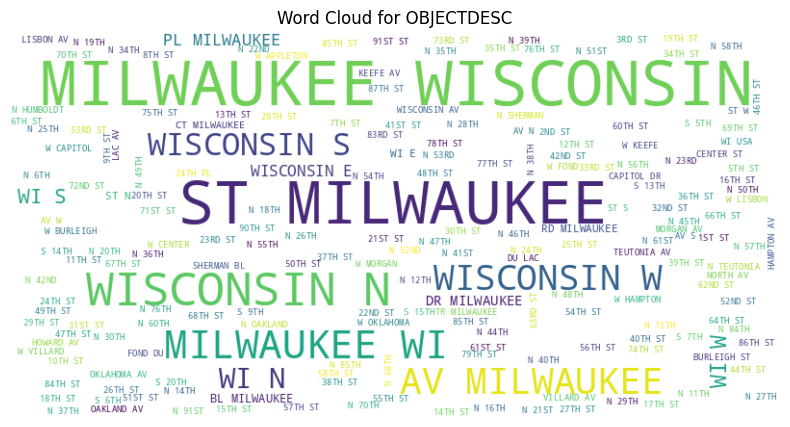

In [87]:
# Wordcloud
Column_WordCloud(df, ["OBJECTDESC"])

**Insights:**.
- "Milwaukee" and "Wisconsin" occur frequently in the OBJECTDESC column

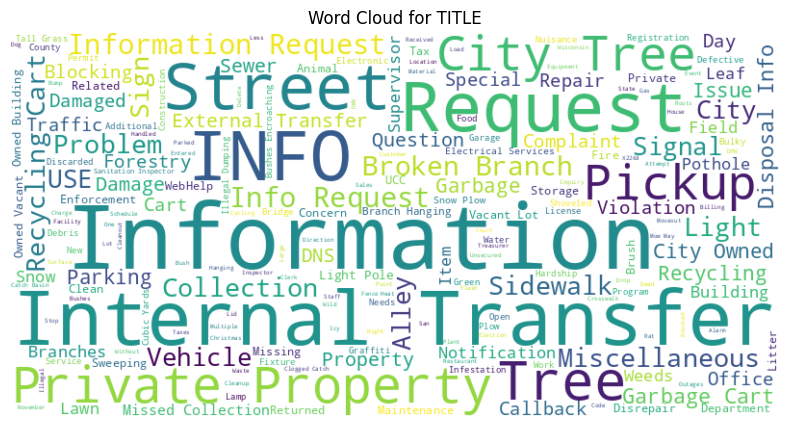

In [88]:
Column_WordCloud(df, ["TITLE"])

**Insights:**.
- Words such as "Information", "Info" and "Internal Transfer" occur frequently in the TITLE column

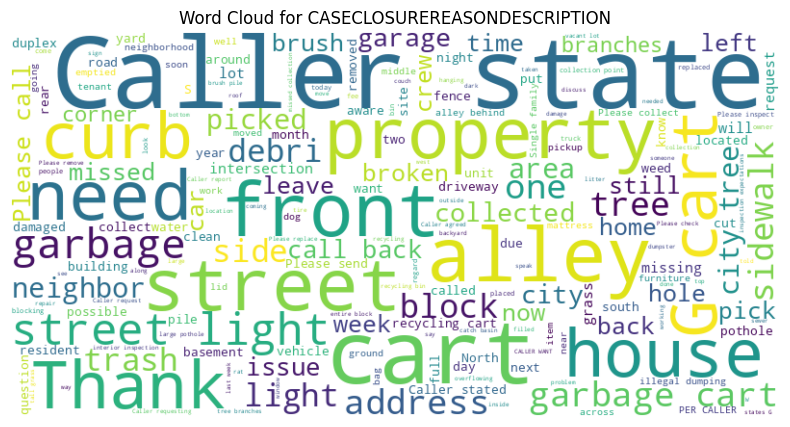

In [89]:
Column_WordCloud(df, ["CASECLOSUREREASONDESCRIPTION"])

**Insights:**.
- Phrase such as "Caller state", "front" and "Street" occur frequently in the CASECLOSUREREASONDESCRIPTION column

# Recommendations:

 - A high proportion of data is missing. We need to check with the data injestion team what is happening.
 - Historical dataset is newer than current dataset. Check with data injestion if this was an error.
 - About 40000 data records are duplicated. Check the data injestion algorithms for errors.